# Intro to Regression with Neural Networks in Tensorflow
* Making prediction from the relationship between the dependent and independent variables

In [1]:
#import tensorflow
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

2022-12-08 16:18:52.148397: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-08 16:18:52.148448: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-08 16:18:53.004567: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-08 16:18:53.004653: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-08 16:18:53.004665: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

2.11.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

        #creating some data
    
#creating Features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#create Labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])


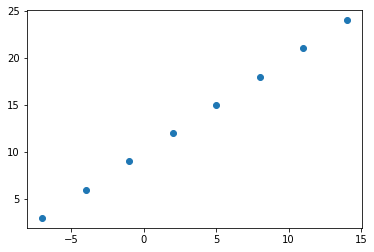

In [3]:
#visualize it
plt.scatter(X,y)

In [4]:
#relstioship
X+10
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output shapes

shapes varies depending n the problem
* problem like housing with features like nbed,utilities and garage as features will require a shape of 3
[bed,utility,garage]
Shape=[3]


In [5]:
#create  a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

2022-12-08 16:18:55.300747: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-08 16:18:55.300793: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-08 16:18:55.300828: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mylar-pc): /proc/driver/nvidia/version does not exist


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape,output_shape

((8,), (8,))

In [7]:
#turn our numpy array into tensors
X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)

X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

# steps in Modeling in Tensorflow
* Create  a model - define  the input and output layers,as well as the hidden layers of a deep learning model

>sequential

>functional


* Compile a model- 

>define the loss function (in other words , the functio which tells our model how wrong it is) and 

>the optimizer (tells our model how to improve the patterns its learning) and

>evaluate metrics (what we  can use to interpret the performance of our model)

* Fitting a model- letting the model try  to find patterns between  X & y( features and labels)

              
#Fit The model
model.fit(x=X,
          y=y,
          epochs=30,
          shuffle=True,
          )

NameError: name 'model' is not defined

#check out X and y
X,y

 try predict
y_pred=model.predict([6.0,7.0,5.0,17.0])
y_pred

# Improving on model

 We can improve our model by altering the steps we took to create a model.
1. **create amodel** - here we might add more layers ,increase the numberof hidden units (all called neurons) within each of the hidden layers,change the activation fucntions of each layer.
2. **Compiling a model** here we might change the optimizeation functions or perhaps the learning rate of the optimization functions.
3. **Fitting a model** - here we might fit a model more epochs (leave it training for longer)or on more data(giving the model examples to learn from

* **Note !**

**Hyperperimeter** is like a dial in the neural network that can be adjusted to see how it improves, where as the perimeter is usually the patterns and neural

In [ ]:
# Hyperimeter

In [ ]:

#Trying   crete the model again

#create the model 
model = tf.keras.Sequential([
    Dense(units=100,input_shape=(1,),activation="relu"),
    Dense(units=50,activation="relu"),
    Dense(units=1)
    
])

# compile the model
model.compile(loss="mae",
              optimizer=tf.optimizers.Adam(learning_rate=0.01),#SGD() , ,
              metrics=['mae']

)


#Fit the model
model.fit(X,
         y,
         epochs=100)

In [ ]:
y_pred=model.predict([17.0,12.0,6.0,5.0,100.0,1.0])
y_pred

In [ ]:
model.summary()

## over fitting 
learning th patterns in the traing ning data too well
 we dont evalutae our model bases on the metrics on thre training data but te metrics on the data not seen before

##some changes we did to improve the model
* Adding a new  layer
*increase the number of hidden units
*change activation functions
*change the optimization
*change learning rate ###most important hyperperemeter change of many neuron network
*Fiting in more data sets

# EVALUATING  A MODEL

**IN PRACTICE , A TIPICAL WORK FLOW WILL BE**
```
Bulid A Model -> Fit it -> Evaluate it->tweak a model->fit it->evaluate it->tweak model -> fit it ->evalute it ... ```

# Note
* When Building a medl you have :experiment, experiment, experiment.
* When it comes to evaluating:visualize, visualize, visualize

 **Visualize:**
 
 * **The Data**- what data are we working with ? what does it look like?
 * **The model itself** What does our model look like?
 * **The training of a model** - how long does a model perform while it  learns
 * **The prediction of the model**- how do hte prediction of a model line up against the ground truth (acual)
 

# Next Dataset

In [9]:
X=tf.range(-100,100,5)
X

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,
        -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,
         10,   15,   20,   25,   30,   35,   40,   45,   50,   55,   60,
         65,   70,   75,   80,   85,   90,   95], dtype=int32)>

In [10]:
y=X+10
y

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-90, -85, -80, -75, -70, -65, -60, -55, -50, -45, -40, -35, -30,
       -25, -20, -15, -10,  -5,   0,   5,  10,  15,  20,  25,  30,  35,
        40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100,
       105], dtype=int32)>

 # The 3 set
 * **Training dataset-70-80%:** ThE model learns from this data 
 * **Validation set- 10-15%** Model gets tuned on this dataset.Testing  on  how the teak affected the model on this data set
 * **Testing dataset- 10-15%**-gets evaluated o this data to test what it has learned.
 
 
 **aim**
 we aim for generalisation ofthe model.
 Being able to perfom well on dT it hasnt seen before

In [11]:
len(X)

40

In [12]:
#Split the data into train and test
X_train = X[:30] #first 40 are traing samples 
y_train = y[:30]

X_test = X[30:] #last 10 are testing samples
y_test = y[30:]
len(X_test), len(y_test)

(10, 10)

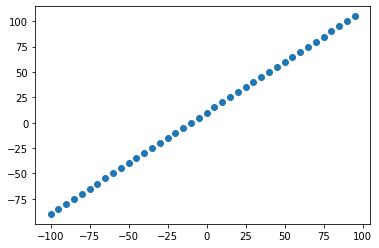

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

## visualising  the data
Now we've got our data in training and testing sets... lets visualize it again


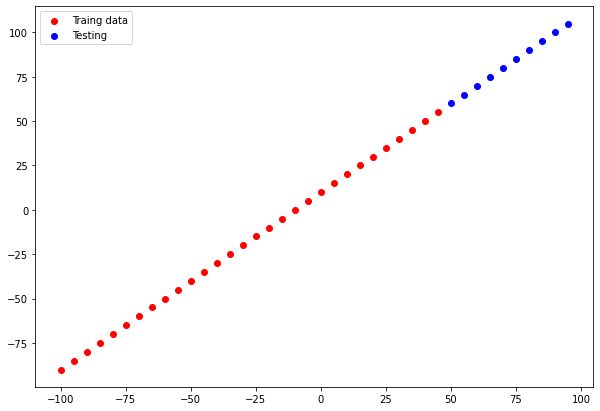

In [14]:
plt.figure(figsize=(10,7))

#plot training data in blue
plt.scatter(X_train,y_train, c="r",label="Traing data")

#plottest data in Green
plt.scatter(X_test,y_test, c='b',label="Testing")
#show a legend
plt.legend();

In [15]:
X_train[:100]

<tf.Tensor: shape=(30,), dtype=int32, numpy=
array([-100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,
        -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,
         10,   15,   20,   25,   30,   35,   40,   45], dtype=int32)>

In [16]:
X_train.ndim,X_train.shape,tf.size(X_train)

(1, TensorShape([30]), <tf.Tensor: shape=(), dtype=int32, numpy=30>)

In [17]:
#bulding the neursl network for the data
# Build model
# tf.random.set_seed(42)
model=tf.keras.Sequential([
    Dense(units=10,input_shape=(1,)),
    Dense(units=1,name='output_layer')
    
],name="model_0")


#compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #Adam(lr=0.01),
              metrics=["mae"]
)




In [18]:
#fit model
model.fit(X_train,
          y_train,
          epochs=100,
          verbose=0
)


# Model summary

In [19]:
#visualize model
model.summary()

Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Dense** means a **fully connected layer**

* Total params - total number of parameters in the model.
* Trainable parameters- these are the parameters (patterns) the model can update as it trains.
* Non-trainable params- these parameters arean't updated  during training (this is typical when you bring in already learn patterns or parameters from the other models during **transfer learning**  


**Reasource** For more indepth overview of parameter within a layer, check out MIT's introduction to deep learning vidoe.

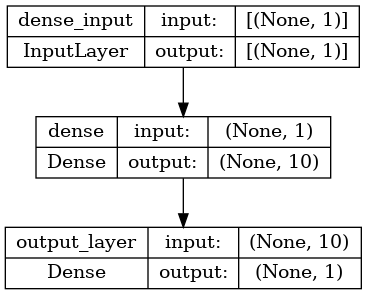

In [20]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

# Visualizeour model predictions

To visualize predictions , it's a god idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test or y_true versus y_pred(ground truth versus your model

In [21]:
#Make Some Prediction
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 83ms/step


array([[32.366516],
       [35.512417],
       [38.658314],
       [41.804214],
       [44.950108],
       [48.09601 ],
       [51.2419  ],
       [54.387802],
       [57.5337  ],
       [60.679592]], dtype=float32)

In [22]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 60,  65,  70,  75,  80,  85,  90,  95, 100, 105], dtype=int32)>

**Note:** if you  feel like you're going to use some kind of functionality in the future , its a good idea to turn it into a function 

# Plotting function 

In [23]:
#Let's create a plotting function
def plot_pred(train_data=X_train,
              train_labels=y_train,
              test_data=X_test,
              test_labels=y_test,
              predictions=y_pred):
    """
    Plot training data,test data and compares predictions to ground truth labels.
    """
    plt.figure(figsize=(10,7))
    #plot the traing data in blue
    plt.scatter(train_data,train_labels,c='b',label="Training data")
    #plot testing data in green
    plt.scatter(test_data,test_labels,c='g',label="Testing data")
    # Plot model's  predictions in red
    plt.scatter(test_data,predictions, c='r',label='Predictions')
    #show the legends
    plt.legend();

## EVALUTIOIN OF MODEL

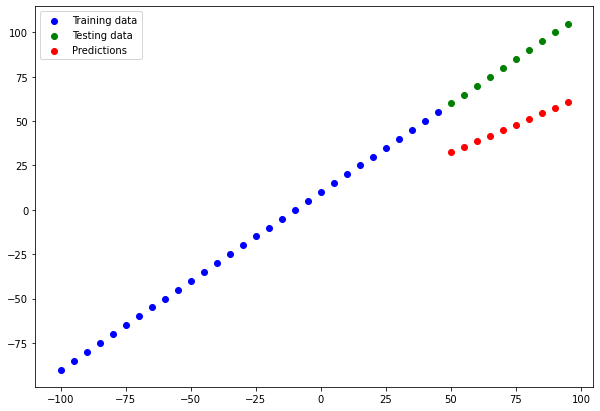

In [24]:
plot_pred()

## Evaluating our model's predictions with regression evelauation metrics

Depending on the problem you'r working on , there will be different evalution metrics to evaluate your model's performance.

Since we're working on a regression , two of the main metrics:
* **MAE** - MEAN ABSOLUTE ERROR, on  average , how wrong is each of my model's predictions.
>as a great starter metrics for any regression problems

* **MSE** - mean square error, square the average errors.
>use this when large errors are more significant than smaller errors
* **Huber** -tf.keras.losses.huber()
>combination of MSE and MAE .less sensitive to outliers than MSE


# First one:

In [25]:
  #Evaluate the model on the test data
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 125ms/step - loss: 35.9769 - mae: 35.9769


[35.97694396972656, 35.97694396972656]

# Second option:

**CALCULATE THE MAE:**
this result should be a scaler value since it adds all records and performs the mae like the result of **model.evaluate(X_test,y_test)**

In [26]:
#ans is tensor array
tf.keras.losses.MAE(y_test,y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([50.133484, 46.987583, 43.841686, 40.695786, 37.549892, 34.40399 ,
       31.258099, 28.112198, 24.966301, 21.956326], dtype=float32)>

In [27]:
#ans is also a tensor array
mae=tf.metrics.mean_absolute_error(y_test,y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([50.133484, 46.987583, 43.841686, 40.695786, 37.549892, 34.40399 ,
       31.258099, 28.112198, 24.966301, 21.956326], dtype=float32)>

In [28]:
y_pred

array([[32.366516],
       [35.512417],
       [38.658314],
       [41.804214],
       [44.950108],
       [48.09601 ],
       [51.2419  ],
       [54.387802],
       [57.5337  ],
       [60.679592]], dtype=float32)

In [29]:
#turn y_pred into a tensor
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[32.366516],
       [35.512417],
       [38.658314],
       [41.804214],
       [44.950108],
       [48.09601 ],
       [51.2419  ],
       [54.387802],
       [57.5337  ],
       [60.679592]], dtype=float32)>

In [30]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 60,  65,  70,  75,  80,  85,  90,  95, 100, 105], dtype=int32)>

we have to **reshape our tensors** in order to do perform a **dot product**

Our **y_pred tensor** has an extra dimention compared to the **y_test**  so we **squeeze the y_pred tensor**


In [31]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([32.366516, 35.512417, 38.658314, 41.804214, 44.950108, 48.09601 ,
       51.2419  , 54.387802, 57.5337  , 60.679592], dtype=float32)>

In [32]:
#calculating the MAE again 
mae=tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=35.976944>

**Calculating the MSE**

In [33]:
#Calculate the mean square error
mse=tf.keras.losses.MSE(y_test,
                    tf.squeeze(y_pred)
)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1322.7014>

In [34]:
#make functions of MAE and MSE
def mae(y_true,y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred))



def mse(y_true,y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))


### Running  experiments to improve our model 
```Bulid A Model -> Fit it -> Evaluate it->tweak a model->fit it->evaluate it->tweak model -> fit it ->evalute it ...```


1. `model_1` - same as original model ,1 layer ,trianed for 150 epochs
2. `model_2` -2 layers, trained for 100 epochs
3. `model_3` -2 layers ,trained for 500 epochs


**Bulid Model_1**

In [35]:
#set random seed
tf.random.set_seed(42)

#create the model
model_1=tf.keras.Sequential([
    Dense(units=10,input_shape=(1,)),
    Dense(units=1)
])

#compile model
model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae']
    
)

#fit model
model_1.fit(X_train,
          y_train,
          epochs=150,
          
)

Epoch 1/150
1/1 [==============================] - 0s 349ms/step - loss: 89.8958 - mae: 89.8958
Epoch 2/150
1/1 [==============================] - 0s 8ms/step - loss: 38.9873 - mae: 38.9873
Epoch 3/150
1/1 [==============================] - 0s 11ms/step - loss: 7.9018 - mae: 7.9018
Epoch 4/150
1/1 [==============================] - 0s 9ms/step - loss: 22.6222 - mae: 22.6222
Epoch 5/150
1/1 [==============================] - 0s 10ms/step - loss: 23.9917 - mae: 23.9917
Epoch 6/150
1/1 [==============================] - 0s 10ms/step - loss: 10.8762 - mae: 10.8762
Epoch 7/150
1/1 [==============================] - 0s 8ms/step - loss: 20.0426 - mae: 20.0426
Epoch 8/150
1/1 [==============================] - 0s 8ms/step - loss: 12.7368 - mae: 12.7368
Epoch 9/150
1/1 [==============================] - 0s 8ms/step - loss: 17.4246 - mae: 17.4246
Epoch 10/150
1/1 [==============================] - 0s 9ms/step - loss: 13.6872 - mae: 13.6872
Epoch 11/150
1/1 [==============================] - 0s 8

1/1 [==============================] - 0s 11ms/step - loss: 15.3771 - mae: 15.3771
Epoch 88/150
1/1 [==============================] - 0s 6ms/step - loss: 13.1228 - mae: 13.1228
Epoch 89/150
1/1 [==============================] - 0s 7ms/step - loss: 14.8319 - mae: 14.8319
Epoch 90/150
1/1 [==============================] - 0s 8ms/step - loss: 13.8398 - mae: 13.8398
Epoch 91/150
1/1 [==============================] - 0s 9ms/step - loss: 14.2724 - mae: 14.2724
Epoch 92/150
1/1 [==============================] - 0s 8ms/step - loss: 14.5758 - mae: 14.5758
Epoch 93/150
1/1 [==============================] - 0s 5ms/step - loss: 13.7014 - mae: 13.7014
Epoch 94/150
1/1 [==============================] - 0s 11ms/step - loss: 14.5411 - mae: 14.5411
Epoch 95/150
1/1 [==============================] - 0s 10ms/step - loss: 13.7075 - mae: 13.7075
Epoch 96/150
1/1 [==============================] - 0s 6ms/step - loss: 14.5109 - mae: 14.5109
Epoch 97/150
1/1 [==============================] - 0s 7ms/s

1/1 [==============================] - 0s 49ms/step


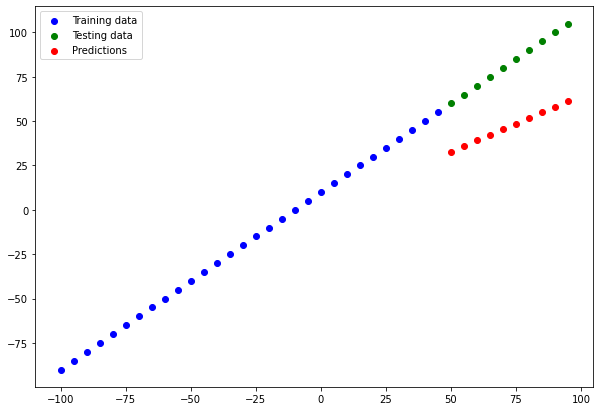

In [36]:
#Visualize predictions for model_1
y_pred_1 = model_1.predict(X_test)

plot_pred(predictions=y_pred_1)



In [37]:
#calculating model_1 evaluation metrics
mae_1 = mae(y_test,y_pred_1)
mse_1= mse(y_test,y_pred_1)

mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=35.491264>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1287.846>)

**model_2**

In [38]:
#set random seed
tf.random.set_seed(42)

#build model
model_2=tf.keras.Sequential([
    Dense(units=10,input_shape=(1,)),
    Dense(units=5),
    Dense(units=1)
])
 #compile Model_2
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae']
)


#Fit model_2
model_2.fit(X_train,
            y_train,
            epochs=50
)

Epoch 1/50
1/1 [==============================] - 0s 369ms/step - loss: 39.7735 - mae: 39.7735
Epoch 2/50
1/1 [==============================] - 0s 9ms/step - loss: 38.4791 - mae: 38.4791
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 41.9889 - mae: 41.9889
Epoch 4/50
1/1 [==============================] - 0s 10ms/step - loss: 33.8463 - mae: 33.8463
Epoch 5/50
1/1 [==============================] - 0s 8ms/step - loss: 21.6630 - mae: 21.6630
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 16.4877 - mae: 16.4877
Epoch 7/50
1/1 [==============================] - 0s 9ms/step - loss: 28.6237 - mae: 28.6237
Epoch 8/50
1/1 [==============================] - 0s 10ms/step - loss: 11.3331 - mae: 11.3331
Epoch 9/50
1/1 [==============================] - 0s 12ms/step - loss: 39.2686 - mae: 39.2686
Epoch 10/50
1/1 [==============================] - 0s 9ms/step - loss: 34.0997 - mae: 34.0997
Epoch 11/50
1/1 [==============================] - 0s 10ms/step

1/1 [==============================] - 0s 53ms/step


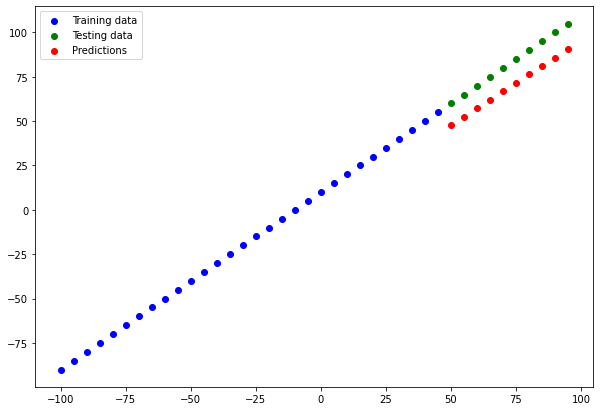

In [39]:
#visualize plot predictionns for model_2
y_pred_2=  model_2.predict(X_test)
plot_pred(predictions=y_pred_2)

In [40]:
#calculating model_2 evaluation metrics
mae_2 = mae(y_test,y_pred_2)
mse_2= mse(y_test,y_pred_2)

mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.263636>,
 <tf.Tensor: shape=(), dtype=float32, numpy=176.44711>)

**model_3**


In [41]:
#bulding the neursl network for the data
# Build model
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    Dense(units=100,input_shape=(1,),activation="relu"),
    Dense(units=1)
    
])


#compile model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01), #Adam(lr=0.01),
              metrics=["mae"]
)

model_3.fit(X_train,
            y_train,
            epochs=1000
)

Epoch 1/1000
1/1 [==============================] - 0s 461ms/step - loss: 35.8365 - mae: 35.8365
Epoch 2/1000
1/1 [==============================] - 0s 8ms/step - loss: 35.3799 - mae: 35.3799
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 34.9227 - mae: 34.9227
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 34.4649 - mae: 34.4649
Epoch 5/1000
1/1 [==============================] - 0s 15ms/step - loss: 34.0064 - mae: 34.0064
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 33.5473 - mae: 33.5473
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 33.0873 - mae: 33.0873
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 32.6266 - mae: 32.6266
Epoch 9/1000
1/1 [==============================] - 0s 13ms/step - loss: 32.1650 - mae: 32.1650
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 31.7024 - mae: 31.7024
Epoch 11/1000
1/1 [=========================

Epoch 87/1000
1/1 [==============================] - 0s 7ms/step - loss: 4.1692 - mae: 4.1692
Epoch 88/1000
1/1 [==============================] - 0s 7ms/step - loss: 4.1851 - mae: 4.1851
Epoch 89/1000
1/1 [==============================] - 0s 9ms/step - loss: 4.2075 - mae: 4.2075
Epoch 90/1000
1/1 [==============================] - 0s 7ms/step - loss: 4.2246 - mae: 4.2246
Epoch 91/1000
1/1 [==============================] - 0s 10ms/step - loss: 4.2369 - mae: 4.2369
Epoch 92/1000
1/1 [==============================] - 0s 6ms/step - loss: 4.2447 - mae: 4.2447
Epoch 93/1000
1/1 [==============================] - 0s 8ms/step - loss: 4.2485 - mae: 4.2485
Epoch 94/1000
1/1 [==============================] - 0s 7ms/step - loss: 4.2486 - mae: 4.2486
Epoch 95/1000
1/1 [==============================] - 0s 6ms/step - loss: 4.2453 - mae: 4.2453
Epoch 96/1000
1/1 [==============================] - 0s 8ms/step - loss: 4.2391 - mae: 4.2391
Epoch 97/1000
1/1 [==============================] - 0s 6ms

1/1 [==============================] - 0s 7ms/step - loss: 3.8720 - mae: 3.8720
Epoch 174/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.8688 - mae: 3.8688
Epoch 175/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.8672 - mae: 3.8672
Epoch 176/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.8640 - mae: 3.8640
Epoch 177/1000
1/1 [==============================] - 0s 5ms/step - loss: 3.8603 - mae: 3.8603
Epoch 178/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.8577 - mae: 3.8577
Epoch 179/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.8549 - mae: 3.8549
Epoch 180/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.8520 - mae: 3.8520
Epoch 181/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.8491 - mae: 3.8491
Epoch 182/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.8461 - mae: 3.8461
Epoch 183/1000
1/1 [==============================] - 0s 7ms/step

1/1 [==============================] - 0s 7ms/step - loss: 3.6073 - mae: 3.6073
Epoch 260/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.6042 - mae: 3.6042
Epoch 261/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.6010 - mae: 3.6010
Epoch 262/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.5978 - mae: 3.5978
Epoch 263/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.5944 - mae: 3.5944
Epoch 264/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.5910 - mae: 3.5910
Epoch 265/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.5876 - mae: 3.5876
Epoch 266/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.5840 - mae: 3.5840
Epoch 267/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.5807 - mae: 3.5807
Epoch 268/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.5772 - mae: 3.5772
Epoch 269/1000
1/1 [==============================] - 0s 7ms/st

1/1 [==============================] - 0s 7ms/step - loss: 3.3059 - mae: 3.3059
Epoch 346/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.3022 - mae: 3.3022
Epoch 347/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.2984 - mae: 3.2984
Epoch 348/1000
1/1 [==============================] - 0s 5ms/step - loss: 3.2946 - mae: 3.2946
Epoch 349/1000
1/1 [==============================] - 0s 5ms/step - loss: 3.2906 - mae: 3.2906
Epoch 350/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.2873 - mae: 3.2873
Epoch 351/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.2830 - mae: 3.2830
Epoch 352/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.2793 - mae: 3.2793
Epoch 353/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.2755 - mae: 3.2755
Epoch 354/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.2716 - mae: 3.2716
Epoch 355/1000
1/1 [==============================] - 0s 6ms/step

1/1 [==============================] - 0s 7ms/step - loss: 2.9525 - mae: 2.9525
Epoch 432/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.9482 - mae: 2.9482
Epoch 433/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.9437 - mae: 2.9437
Epoch 434/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.9391 - mae: 2.9391
Epoch 435/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.9343 - mae: 2.9343
Epoch 436/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.9295 - mae: 2.9295
Epoch 437/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.9245 - mae: 2.9245
Epoch 438/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.9194 - mae: 2.9194
Epoch 439/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.9155 - mae: 2.9155
Epoch 440/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.9100 - mae: 2.9100
Epoch 441/1000
1/1 [==============================] - 0s 10ms/ste

1/1 [==============================] - 0s 9ms/step - loss: 2.4975 - mae: 2.4975
Epoch 518/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.4886 - mae: 2.4886
Epoch 519/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.4830 - mae: 2.4830
Epoch 520/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.4772 - mae: 2.4772
Epoch 521/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.4712 - mae: 2.4712
Epoch 522/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.4650 - mae: 2.4650
Epoch 523/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.4586 - mae: 2.4586
Epoch 524/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.4521 - mae: 2.4521
Epoch 525/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.4454 - mae: 2.4454
Epoch 526/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.4397 - mae: 2.4397
Epoch 527/1000
1/1 [==============================] - 0s 7ms/step

1/1 [==============================] - 0s 5ms/step - loss: 1.8764 - mae: 1.8764
Epoch 604/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.8677 - mae: 1.8677
Epoch 605/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.8626 - mae: 1.8626
Epoch 606/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.8515 - mae: 1.8515
Epoch 607/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.8437 - mae: 1.8437
Epoch 608/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.8357 - mae: 1.8357
Epoch 609/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.8274 - mae: 1.8274
Epoch 610/1000
1/1 [==============================] - 0s 15ms/step - loss: 1.8188 - mae: 1.8188
Epoch 611/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.8101 - mae: 1.8101
Epoch 612/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.8011 - mae: 1.8011
Epoch 613/1000
1/1 [==============================] - 0s 6ms/ste

1/1 [==============================] - 0s 11ms/step - loss: 1.0029 - mae: 1.0029
Epoch 690/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.9838 - mae: 0.9838
Epoch 691/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.9597 - mae: 0.9597
Epoch 692/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.9448 - mae: 0.9448
Epoch 693/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.9311 - mae: 0.9311
Epoch 694/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.9202 - mae: 0.9202
Epoch 695/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.9065 - mae: 0.9065
Epoch 696/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.8939 - mae: 0.8939
Epoch 697/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.8810 - mae: 0.8810
Epoch 698/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.8678 - mae: 0.8678
Epoch 699/1000
1/1 [==============================] - 0s 6ms/ste

1/1 [==============================] - 0s 6ms/step - loss: 0.3553 - mae: 0.3553
Epoch 776/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1431 - mae: 0.1431
Epoch 777/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.2803 - mae: 0.2803
Epoch 778/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2634 - mae: 0.2634
Epoch 779/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2205 - mae: 0.2205
Epoch 780/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2695 - mae: 0.2695
Epoch 781/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.1773 - mae: 0.1773
Epoch 782/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.3369 - mae: 0.3369
Epoch 783/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.3774 - mae: 0.3774
Epoch 784/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1910 - mae: 0.1910
Epoch 785/1000
1/1 [==============================] - 0s 8ms/s

1/1 [==============================] - 0s 10ms/step - loss: 0.1057 - mae: 0.1057
Epoch 862/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.3437 - mae: 0.3437
Epoch 863/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.3909 - mae: 0.3909
Epoch 864/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2654 - mae: 0.2654
Epoch 865/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0874 - mae: 0.0874
Epoch 866/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.3171 - mae: 0.3171
Epoch 867/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.3850 - mae: 0.3850
Epoch 868/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.3221 - mae: 0.3221
Epoch 869/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.1019 - mae: 0.1019
Epoch 870/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.3462 - mae: 0.3462
Epoch 871/1000
1/1 [==============================] - 0s 6ms/st

1/1 [==============================] - 0s 6ms/step - loss: 0.0753 - mae: 0.0753
Epoch 948/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.1307 - mae: 0.1307
Epoch 949/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0968 - mae: 0.0968
Epoch 950/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.1801 - mae: 0.1801
Epoch 951/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.1967 - mae: 0.1967
Epoch 952/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0930 - mae: 0.0930
Epoch 953/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2380 - mae: 0.2380
Epoch 954/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.3042 - mae: 0.3042
Epoch 955/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2266 - mae: 0.2266
Epoch 956/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0668 - mae: 0.0668
Epoch 957/1000
1/1 [==============================] - 0s 6ms/step

In [ ]:
#visualize plot predictionns for model_3
y_pred_3=  model_3.predict(X_test)
plot_pred(predictions=y_pred_3)

In [ ]:
#calculating model_2 evaluation metrics
mae_3 = mae(y_test,y_pred_3)
mse_3= mse(y_test,y_pred_3)

mae_3,mse_3